### Install dependencies

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

### Initialize simulation settings

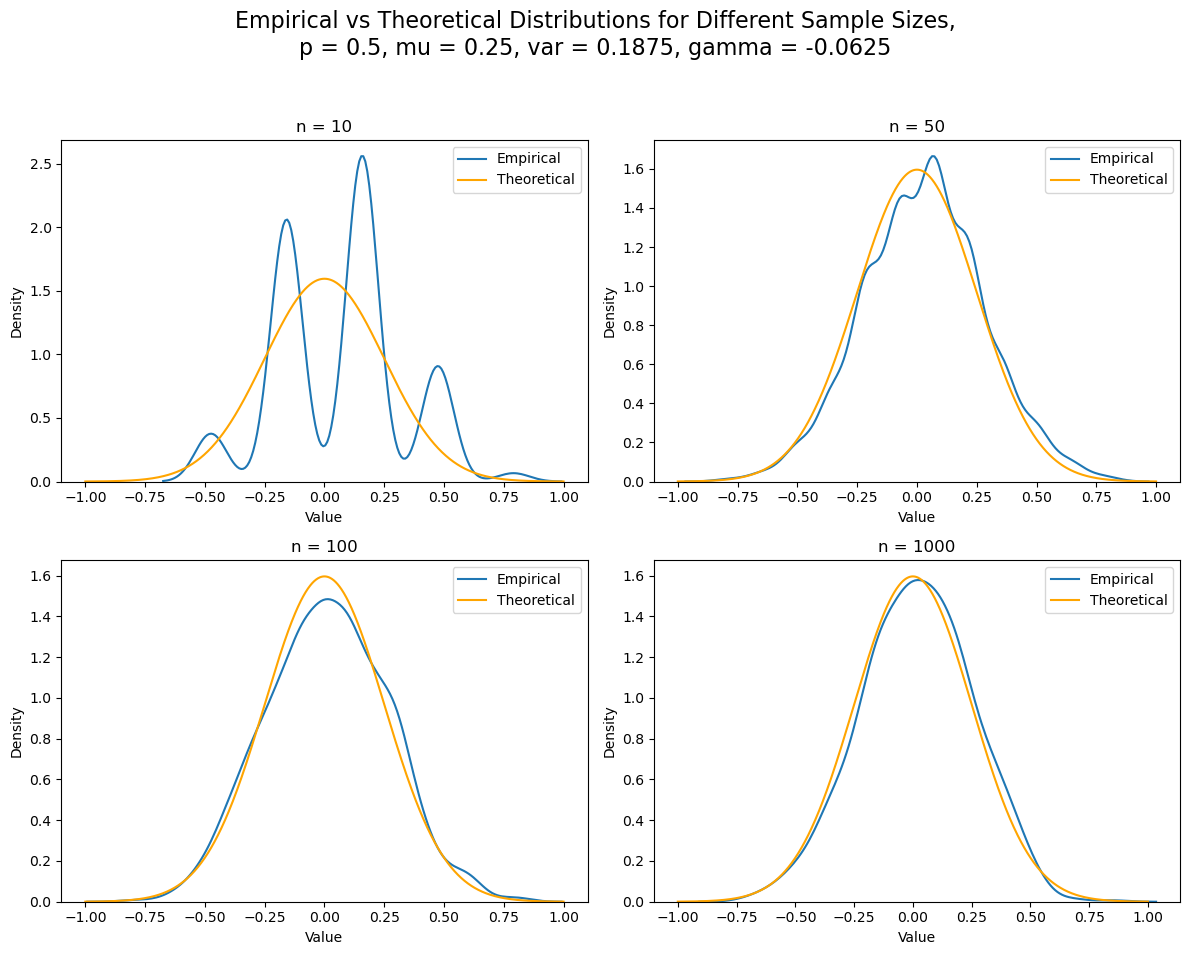

In [3]:
sample_size_list = [10, 50, 100, 1000]  # n = 10, 100, 1000, 10000
repetition = 1000  # number of points to plot
seed = 42
p = 0.5  # probability of success
mu = p * (1 - p)  # expected value of Y_i
var = mu * (1 - mu)  # sample variance of Y_i
gamma = - mu ** 2  # covariance between Y_1 and Y_2

# create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Empirical vs Theoretical Distributions for Different Sample Sizes' +  ',\n'  + 
             'p = ' + str(p) + ', mu = ' + str(mu) + ', var = ' + str(var) + ', gamma = ' + str(gamma), fontsize=16) # set title

x_values = np.linspace(-1, 1, repetition)
theoretical = norm.pdf(x_values, loc = 0, scale = np.sqrt(var + 2 * gamma))

for i, n in enumerate(sample_size_list):
    empirical = []
    for rep in range(repetition):
        np.random.seed(seed + rep)  # set seed for reproducibility
        X = np.random.binomial(1, p, size=n)
        Y = [X[i + 1] * (1 - X[i]) for i in range(n - 1)]
        Tn = sum(Y) + X[0]
        empirical.append(np.sqrt(n) * (Tn / n - mu))
    
    # Plotting in each subplot
    row, col = divmod(i, 2)  # calculate row and column indices
    sns.kdeplot(empirical, label='Empirical', ax=axs[row, col])
    axs[row, col].plot(x_values, theoretical, label='Theoretical', color='orange')
    
    axs[row, col].set_title(f'n = {n}')
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Density')
    axs[row, col].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # adjust the position of the subplots
plt.show()
